In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#worldcloud
from wordcloud import WordCloud
import re
import string
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Tweet pre-processor
!pip install tweet-preprocessor
import preprocessor as p

#vaderSentiment
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# NLTK
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('words')


# Stanza
!pip install Stanza
import stanza
stanza.download('en')
import warnings

#NeatText
!pip install neattext
import neattext.functions as nfx

#Spacy
!pip install spacy
import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
data = pd.read_csv('floodtweetraw data.csv')
print(data.shape)
data.isnull().any()
data.head(5)

(1001, 4)


,Time and Date,Tweet Id,Text,Username
0,2022-09-23 23:54:08+00:00,1573460741016911872,Dera ghazi khan. Last village flood victims were walking in stranded water getting infected. #fl...,Aliyounas15
1,2022-09-23 23:39:33+00:00,1573457067741937665,⚠️ Final #Flood Warning issued for #Wilsons River. #Lismore peaked below the minor flood level. ...,BOM_NSW
2,2022-09-23 23:34:52+00:00,1573455892795768832,⚠️Final #Flood Warning issued for #Belubula River. #Canowindra peaked below the minor flood leve...,BOM_NSW
3,2022-09-23 23:30:44+00:00,1573454852818182144,"RIP 27 857) #Irish #Feargus #Flood, the #judge #who #chaired #landmark #planning #tribunal, ...",004nino
4,2022-09-23 23:00:01+00:00,1573447118823608359,Forecast map for this evening . Get Maps and Radars at https://t.co/HNLPnb8GMF \...,livewxradar


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 10')

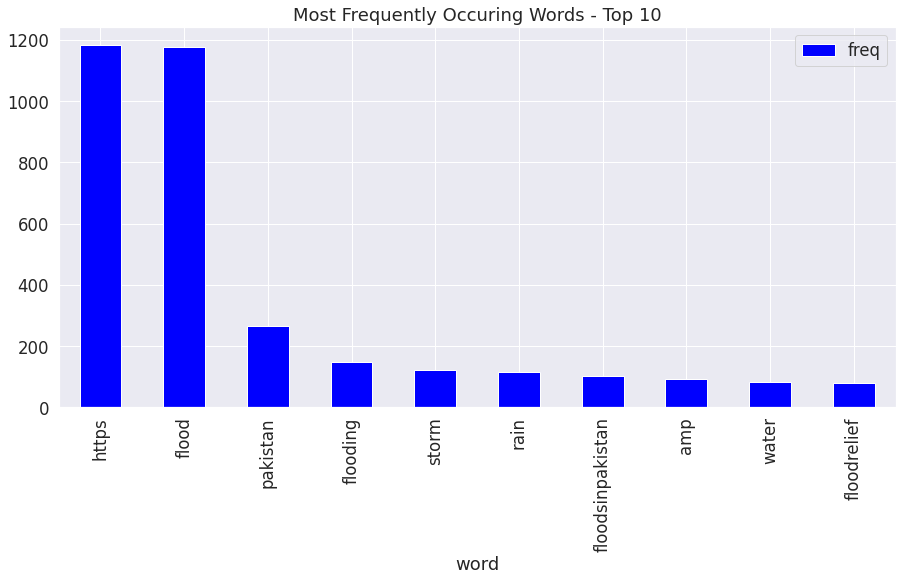

In [81]:
#checking frequency of words

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.Text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 10")

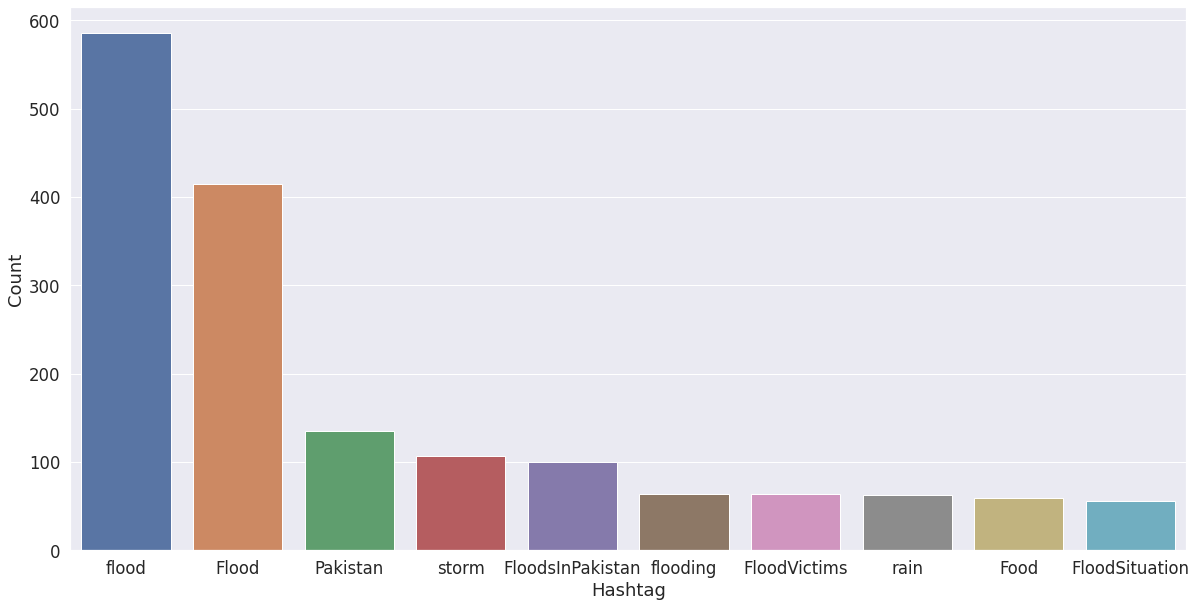

In [82]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
  # extracting hashtags from non racist tweets
HT_regular = hashtag_extract(data['Text'])
# unnesting list
HT_regular = sum(HT_regular,[])
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 

plt.figure(figsize=(20,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

***DATA PREPROCESSING*** 

In [95]:
# Keep only tweets that involve these KEYWORDS
data = data[(data['Text'].str.contains("floodsinpakistan")) 
                            | (data['Text'].str.contains("floodpakistan"))
                            | (data['Text'].str.contains("floodrelief"))
                            | (data['Text'].str.contains("pakistan"))
                            | (data['Text'].str.contains("floodvictims"))
                            | (data['Text'].str.contains("floodsituation"))
                            | (data['Text'].str.contains("flooding"))]
len(data)

118

In [97]:
#converting column names and text data to lower case
data['Text'] = data['Text'].apply(lambda x: str(x.lower()))

# Note, skipping this step as uppercase reflects sentiments

In [98]:
# Clean tweet text with tweet-preprocessor
data['text_cleaned'] = data['Text'].apply(lambda x: p.clean(x))
data.head()

,Time and Date,Tweet Id,Text,Username,text_cleaned,Word Counts,Stop Words
0,2022-09-23 23:54:08+00:00,1573460741016911872,dera ghazi khan. last village flood victims were walking in stranded water getting infected. #fl...,Aliyounas15,dera ghazi khan. last village flood victims were walking in stranded water getting infected.,14,11
1,2022-09-23 23:00:01+00:00,1573447118823608359,forecast map for this evening . get maps and radars at https://t.co/hnlpnb8gmf \...,livewxradar,forecast map for this evening . get maps and radars at oler -storms weather outlook,15,10
2,2022-09-23 21:27:00+00:00,1573423711281025024,forecast map for this evening . https://t.co/hnlpnbqhed \n#wx #weather #storm #f...,livewxradar,forecast map for this evening . -storms weather outlook,9,7
3,2022-09-23 21:05:13+00:00,1573418232429568000,فرانسیسی صدر سے ملاقات پر ردِعمل\nشہزادہ شبیر احمد صدیقی صدر پنجاب پاکستان مسلم الائنس(pma)\n\n#...,PMA_Punjab,(pma),1,1
4,2022-09-23 20:52:34+00:00,1573415045404688384,our partners on the ground in pakistan are distributing emergency supplies as your donations com...,PennyAppealCa,our partners on the ground in pakistan are distributing emergency supplies as your donations com...,20,13


In [99]:
# Remove unnecessary characters

punct =['%','/',':','\\','&amp;','&',';']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text
data['text_cleaned'] = data['text_cleaned'].apply(lambda x: remove_punctuations(x))

In [100]:
# Drop tweets which have empty text field
data['text_cleaned'].replace('', np.nan, inplace=True)
data['text_cleaned'].replace(' ', np.nan, inplace=True)
data.dropna(subset=['text_cleaned'], inplace=True)
len(data)

118

In [101]:
# Remove duplicate tweets
data.drop_duplicates(subset='text_cleaned', keep="first", inplace = True)
len(data)

118

In [102]:
data = data.reset_index(drop=True)
data.sample(5)

,Time and Date,Tweet Id,Text,Username,text_cleaned,Word Counts,Stop Words
103,2022-09-22 01:00:01+00:00,1572752546141175814,forecast map for this evening. https://t.co/hnlpnb8gmf \n#wx #weather #storm #f...,livewxradar,forecast map for this evening.,5,3
97,2022-09-22 05:04:37+00:00,1572814100589326338,"⚠️ #flood warning issued for #nambucca river, moderate flooding possible at #bowraville overnigh...",BOM_NSW,"warning issued for river, moderate flooding possible at overnight. see for details and updates f...",18,12
114,2022-09-21 14:15:14+00:00,1572590280078925824,my colonial house in #leonnicaragua #nicaragua is #flooding from all of the #rain today. #flood ...,scottalanmiller,my colonial house in is from all of the today.,10,3
116,2022-09-21 13:58:13+00:00,1572585996285546499,in ko zara b afsos nai h ham n pakistan k liye kitna kurban kiye apna behan bhai or phr ja kar y...,MagrSss,in ko zara b afsos nai h ham n pakistan k liye kitna kurban kiye apna behan bhai or phr ja kar y...,57,51
23,2022-09-23 13:01:09+00:00,1573296411034415106,gurgaon/delhi people be like: when life gives you rain - make an adventure out of it 😜🌧️\n.\ntag...,tripzy_go,gurgaondelhi people be like when life gives you rain - make an adventure out of it .tag your fri...,23,12


In [103]:
#determining word count in text
data['Word Counts'] = data['text_cleaned'].apply(lambda x: len([i for i in x.split()]))
data.head()

,Time and Date,Tweet Id,Text,Username,text_cleaned,Word Counts,Stop Words
0,2022-09-23 23:54:08+00:00,1573460741016911872,dera ghazi khan. last village flood victims were walking in stranded water getting infected. #fl...,Aliyounas15,dera ghazi khan. last village flood victims were walking in stranded water getting infected.,14,11
1,2022-09-23 23:00:01+00:00,1573447118823608359,forecast map for this evening . get maps and radars at https://t.co/hnlpnb8gmf \...,livewxradar,forecast map for this evening . get maps and radars at oler -storms weather outlook,15,10
2,2022-09-23 21:27:00+00:00,1573423711281025024,forecast map for this evening . https://t.co/hnlpnbqhed \n#wx #weather #storm #f...,livewxradar,forecast map for this evening . -storms weather outlook,9,7
3,2022-09-23 21:05:13+00:00,1573418232429568000,فرانسیسی صدر سے ملاقات پر ردِعمل\nشہزادہ شبیر احمد صدیقی صدر پنجاب پاکستان مسلم الائنس(pma)\n\n#...,PMA_Punjab,(pma),1,1
4,2022-09-23 20:52:34+00:00,1573415045404688384,our partners on the ground in pakistan are distributing emergency supplies as your donations com...,PennyAppealCa,our partners on the ground in pakistan are distributing emergency supplies as your donations com...,20,13


In [104]:
#determining stop words( stop wordsdoes not add much information to the text)
from spacy.lang.en.stop_words import STOP_WORDS
data['Stop Words'] = data['text_cleaned'].apply(lambda x: len([i for i in x.split() if i not in STOP_WORDS]))
data.head()

,Time and Date,Tweet Id,Text,Username,text_cleaned,Word Counts,Stop Words
0,2022-09-23 23:54:08+00:00,1573460741016911872,dera ghazi khan. last village flood victims were walking in stranded water getting infected. #fl...,Aliyounas15,dera ghazi khan. last village flood victims were walking in stranded water getting infected.,14,11
1,2022-09-23 23:00:01+00:00,1573447118823608359,forecast map for this evening . get maps and radars at https://t.co/hnlpnb8gmf \...,livewxradar,forecast map for this evening . get maps and radars at oler -storms weather outlook,15,10
2,2022-09-23 21:27:00+00:00,1573423711281025024,forecast map for this evening . https://t.co/hnlpnbqhed \n#wx #weather #storm #f...,livewxradar,forecast map for this evening . -storms weather outlook,9,7
3,2022-09-23 21:05:13+00:00,1573418232429568000,فرانسیسی صدر سے ملاقات پر ردِعمل\nشہزادہ شبیر احمد صدیقی صدر پنجاب پاکستان مسلم الائنس(pma)\n\n#...,PMA_Punjab,(pma),1,1
4,2022-09-23 20:52:34+00:00,1573415045404688384,our partners on the ground in pakistan are distributing emergency supplies as your donations com...,PennyAppealCa,our partners on the ground in pakistan are distributing emergency supplies as your donations com...,20,13


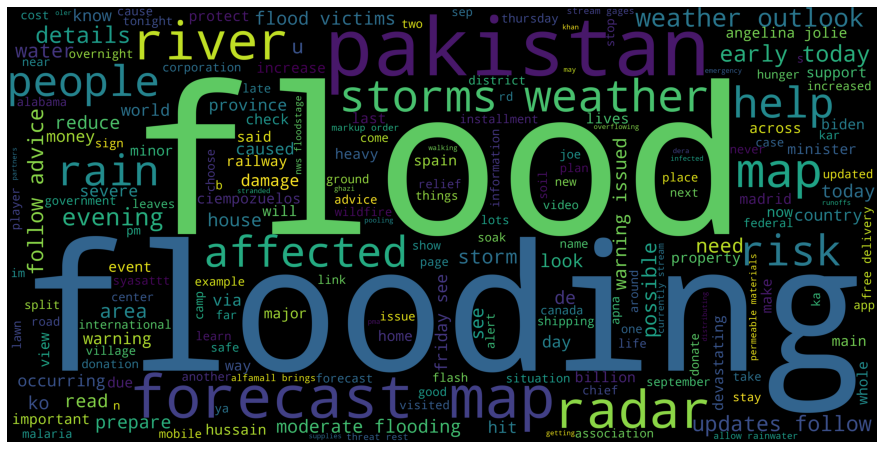

In [105]:
# Import new libraries
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
# Create a wordcloud of the movie titles
data['text_cleaned'] = data['text_cleaned'].fillna("").astype('str')
title_corpus = ' '.join(data['text_cleaned'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)
# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

***SENTIMENT ANALYSIS***

Using NLP techniques:

*   NLTK Vader






In [106]:
# Define function to get value counts
def get_value_counts(col_name, analyzer_name):
    count = pd.DataFrame(data[col_name].value_counts())
    percentage = pd.DataFrame(data[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

 **Sentiment Analysis with NLTK Vader**

*   VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
  



In [107]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
data['nltk_scores'] = data['text_cleaned'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
data['nltk_cmp_score'] = data['nltk_scores'].apply(lambda score_dict: score_dict['compound'])
# Set threshold to define neutral sentiment
neutral_thresh = 0.05
# Categorize scores into the sentiments of positive, neutral or negative
data['nltk_sentiment'] = data['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))
data['nltk_cmp_score'].describe()


count    118.000000
mean      -0.031958
std        0.430505
min       -0.886000
25%       -0.354625
50%        0.000000
75%        0.070800
max        0.888500
Name: nltk_cmp_score, dtype: float64

In [109]:
nltk_sentiment_df = get_value_counts('nltk_sentiment','NLTK Vader')
nltk_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,43,36.44,NLTK Vader
1,Neutral,44,37.29,NLTK Vader
2,Positive,31,26.27,NLTK Vader


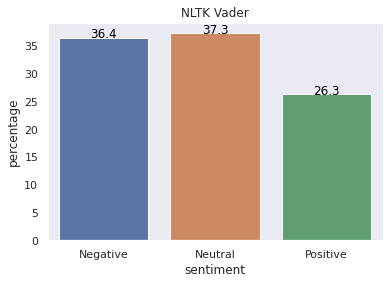

In [110]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=nltk_sentiment_df)
ax.set_title('NLTK Vader')

for index, row in nltk_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")